# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

Say there exists a linear relationship between an independent, explanatory variable $x$ and a dependent, response variable $y$. The relationship can be described in the form of a general **linear regression model**:

$$y = \beta_0 + \beta_1 x$$

where $\beta_0$ and $\beta_1$ are the true (but unknown) constant values that express the relationship between $x$ and $y$. When modeling data in general, and especially in the real world, the data I obtain is almost always going to have some sort of deviation between the actual value of $y$ and the model's expected value of $y$ for any given $x$. These deviations are known as **errors**. So if I have a collection of $n$ observational $(x, y)$ data points in dataset $D$, I can more accurately describe the relationship between $x$ and $y$ for each observed data point as:

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

where $i$ is the $i^{th}$ term in the dataset $D$. Taking all data points into account, I can write this in matrix form:

$$
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
\end{bmatrix}
=
\begin{bmatrix}
    \beta_0 + \beta_1 x_1 \\
    \beta_0 + \beta_1 x_2 \\
    \vdots \\
    \beta_0 + \beta_1 x_n
\end{bmatrix}
+
\begin{bmatrix}
    \epsilon_1 \\
    \epsilon_2 \\
    \vdots \\
    \epsilon_n
\end{bmatrix}
$$

which is the same as:

$$
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
\end{bmatrix}
=
\begin{bmatrix}
    1 & x_1 \\
    1 & x_2 \\
    \vdots & \vdots \\
    1 & x_n
\end{bmatrix}
\begin{bmatrix}
    \beta_0 \\
    \beta_1
\end{bmatrix}
+
\begin{bmatrix}
    \epsilon_1 \\
    \epsilon_2 \\
    \vdots \\
    \epsilon_n
\end{bmatrix}
$$

which can also be written as:

$$ \mathbf{Y} = \mathbf{X}\boldsymbol\beta + \boldsymbol\epsilon$$

where $\mathbf{Y}_{n \times 1}$ is the vector of responses, $\mathbf{X}_{n \times 2}$ is the design matrix, $\boldsymbol\beta_{2 \times 1}$ is the vector of parameters, and $\boldsymbol\epsilon_{n \times 1}$ is the vector of error terms.

I expect my collection of data points to be a good representation of the total population. However, because my sample dataset doesn't contain the whole population, it is unlikely that the line of best fit calculated from my collection of data points will have parameters that are exactly equivalent to the true values of $\beta_0$ and $\beta_1$ (but theoretically it should be close if I took a good sample). That means the best model I can come up with given my dataset is:

$$\hat{y} = \hat{\beta}_0 + \hat{\beta} x$$

where $\hat{\beta}_0$ is my estimation of the true $\beta_0$, $\hat{\beta}_1$ is my estimation of the true $\beta_1$, and $\hat{y}$ is the predicted $y$ value. For each observed data point, the relationship between $x$ and $y$ is then:

$$y_i = \hat{\beta}_0 + \hat{\beta}_1 x_i + \hat{\epsilon}_i$$

where $\hat{\epsilon}_i$ is the **residual** value for point $i$. The residual value is the difference in distance between the $y$ value predicted by the model and the $y$ value in the dataset.

In matrix form, the relationship is:

$$ \mathbf{Y} = \mathbf{X}\hat{\boldsymbol\beta} + \hat{\boldsymbol\epsilon}$$

Now, say I have collected some pairs of $x$ and $y$ samples and stored those values in a dataset $D$. Perhaps my dataset contains these specific values:

$$D = [(-1.5, 4),(-0.1, 4),(0.6, 3.1),(2.3, 0.3),(-1.2, 2.4),(1.6, 0.4),(1.7, 1.2),(-0.2, 2.4),(0.7, 2.3),(0.5, 1.75)]$$

I can quickly graph a scatterplot of the data to get a glimpse of what the data looks like:

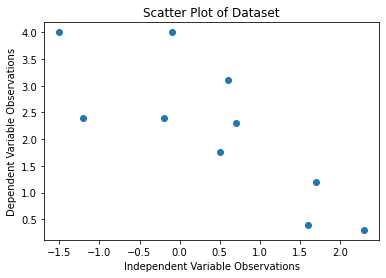

In [2]:
dataset = [(-1.5, 4),(-0.1, 4),(0.6, 3.1),(2.3, 0.3),(-1.2, 2.4),(1.6, 0.4),(1.7, 1.2),(-0.2, 2.4),(0.7, 2.3),(0.5, 1.75)]

plt.title("Scatter Plot of Dataset")
plt.xlabel("Independent Variable Observations")
plt.ylabel("Dependent Variable Observations")
plt.scatter(x=[p[0] for p in dataset], y=[p[1] for p in dataset])
plt.show()

From here, I want to figure out what is the line of best fit.

## Least Absolute Deviations

One (less popular) way of finding the line of best is to create a function takes in two inputs $(\hat{\beta}_0, \hat{\beta}_1)$ and calculates the total residual sum between the line and each given data point. The parameters that minimize the residual sum will be the parameters of the best fit regression line. This residual sum function is:

$$RS = \sum\limits_{i = 1}^{n} |\hat{\epsilon}_i| = \sum\limits_{i = 1}^{n} |y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i|$$

where $n$ represents the number of data points in the dataset and $i$ represents the $i^{th}$ data point.

This is an optimization problem where I have to find the inputs $(\hat{\beta}_0, \hat{\beta}_1)$ that produce the smallest $RS$ output. To find the smallest output, I can look for the critical points that make all first-order partial derivates of the residual sum function either equal to $0$ or undefined. The **gradient** for the $RS$ function is:

$$
\nabla RS =
\begin{bmatrix}
    RS_{\hat{\beta}_0} \\
    RS_{\hat{\beta}_1}
\end{bmatrix}
=
\begin{bmatrix}
    \sum\limits_{i = 1}^{n} \frac{y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i}{|y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i|} \\
    \sum\limits_{i = 1}^{n} \frac{-x_i(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)}{|y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i|}
\end{bmatrix}
$$

It's easy to see all the $\hat{\beta}_0$, $\hat{\beta}_1$ values that make the gradient undefined. As long as values are picked such that $y_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$ for every $(x_i,y_i)$ in the dataset, those values are supposedly possible candidates that minimze the residual sum function. However, it is much harder to solve for the $\hat{\beta}_0$, $\hat{\beta}_1$ values that make $\nabla RS$ equal to the zero vector.

There are a few things I can note here in my attempt to find values that make $\nabla RS$ equal to $\mathbf{0}_{2 \times 1}$. One note is that each term in the $RS_{\hat{\beta}_0}$ summation is essentially a modified signum function that takes in two inputs. As long as the denominator for a particular term is defined, the term is simplified to either a value of $-1$ or $1$. This means that, for an odd number of data points, this sum can never total to $0$, meaning $\nabla RS$ can never equal the zero vector. However, for an even number of data points, finding values that produce $0$ is still an issue.

Another note is that in order for $\nabla RS$ to be equal to the zero vector, $RS_{\hat{\beta}_0}$ must be equal to zero. It may be easier to find the $\hat{\beta}_0$, $\hat{\beta}_1$ values that make $RS_{\hat{\beta}_0}$ equal to $0$ and then plug those $\hat{\beta}_0$, $\hat{\beta}_1$ values into $RS_{\hat{\beta}_1}$ and filter out the inputs that do not make $RS_{\hat{\beta}_1}$ equal to $0$.

Even with these observations, it is still difficult to solve for the $\hat{\beta}_0$, $\hat{\beta}_1$ that make $\nabla RS$ equal to the zero vector, so a different approach is needed to find the line of best fit.

Let me assume for a moment that there is only one point in my dataset. The line of best fit is any line that passes through the data point and there are an infinte amount of these lines. Every possible best fit line can be defined with $\hat{\beta}_0$, $\hat{\beta}_1$ values that makes the expression $y_1 = \hat{\beta}_0 + \hat{\beta}_1 x_1$ true. For two points in a dataset, there is only one line of best fit - the line that passes through the two points. This line can be expressed with the $\hat{\beta}_0$, $\hat{\beta}_1$ values that satisfies the system of equations $y_1 = \hat{\beta}_0 + \hat{\beta}_1 x_1$ and $y_2 = \hat{\beta}_0 + \hat{\beta}_1 x_2$. Somewhat intuitively, these two linear equations represent the lines where $\nabla RS$ is undefined. Each $\hat{\beta}_0$, $\hat{\beta}_1$ value generated by each line is a solution to the optimization problem that "minimizes" the distance between the regression line and its corresponding point. So naturally, the most optimal solution for two data points are where these two lines intersect each other.

With an addition of a third data point to data set, this produces a third line that makes $\nabla RS$ undefined. Unless all three points happen to be perfectly aligned, in general, linear regression on a dataset of three or more points will produce a non-zero residual sum. This behavior is reflected when graphing on a plane the three lines that make $\nabla RS$ undefined - the three lines all interesect each other at three different points. The $\hat{\beta}_0$, $\hat{\beta}_1$ values at these three intersections correspond to three regression lines where each regression line is essentially a line drawn across every possible pairing of points. One of these three lines will be a solution to the best fit line for least absolute deviations.

Following this pattern for $n$ number of points in my data set, I can (very loosely) conclude that I can find the best fit line by finding every line for every possible pairing of points, calculate each ones $RS$ value, and keeping the one that ends up giving me the smallest $RS$ value. According to [Wikipedia](https://en.wikipedia.org/wiki/Least_absolute_deviations#Solution) (pulled on 10 May 2022), _Since it is known that at least one least absolute deviations line traverses at least two data points, this method will find a line by comparing the SAE (Smallest Absolute Error over data points) of each line, and choosing the line with the smallest SAE_, so the strategy works. <span style="color:red">I'll have to revisit this section at some point to really find a more full and comprehensive way of getting the best fit line, but this is fine for now.</span>

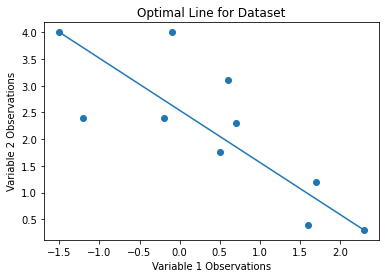

Optimal Line: y = 2.539473684210526 + -0.9736842105263159x
Smallest Residual Sum: 5.792105263157895


In [3]:
rs_func = lambda b_0_hat, b_1_hat: sum([abs(y_i - b_0_hat - b_1_hat * x_i) for x_i, y_i in dataset])

min_rs_sum = float("inf")
b_0_hat = None
b_1_hat = None

for i in range(0, len(dataset) - 1):
    for j in range(i + 1, len(dataset)):
        b_1_hat_candidate = (dataset[i][1] - dataset[j][1]) / (dataset[i][0] - dataset[j][0])
        b_0_hat_candidate = dataset[i][1] - b_1_hat_candidate * dataset[i][0]
        rs_sum = rs_func(b_0_hat_candidate, b_1_hat_candidate)
        if rs_sum < min_rs_sum:
            min_rs_sum = rs_sum
            b_0_hat = b_0_hat_candidate
            b_1_hat = b_1_hat_candidate

x_vals = np.linspace(min([x_i for x_i, y_i in dataset]), max([x_i for x_i, y_i in dataset]), num=100)
y_vals = b_0_hat + b_1_hat * x_vals

plt.title("Optimal Line for Dataset")
plt.xlabel("Variable 1 Observations")
plt.ylabel("Variable 2 Observations")
plt.scatter(x=[p[0] for p in dataset], y=[p[1] for p in dataset])
plt.plot(x_vals, y_vals)
plt.show()

print("Optimal Line: y = {} + {}x".format(b_0_hat, b_1_hat))
print("Smallest Residual Sum:", rs_func(b_0_hat, b_1_hat))

One important thing to note is it is possible for there to be multiple lines of best fit for least absolute deviations. Consider the simple dataset of points $D = [(0, 0),(0, 1),(1, 0),(1, 1)]$. $y = 0.5$ and $y = x$ would both produce the same smallest $RS$ value and are both solutions to the optimization problem.

Finding the regression line for least absolute deviations DOES NOT have a **closed form solution** because it can only be solve iteratively through trial and error.

The runtime of finding the least absolute deviations regression line is $O(n^2)$, assuming the residual sum function was hard coded (which is not the case here - my code has a cubic running time).

## Least Squares

The least squares method is a more popular way of finding the line of best fit. It is another way of measuring the discrepancies between a data points and a regression line. Intuitively, it doesn't make that much sense to me why we square the vertical residuals - and maybe there isn't any intuitive meaning behind the squared distances at all. The only thing least squares really has going for it is that finding the regression line is supposedly less complicated. Plus, squaring each residual doesn't make "that big of a difference". Larger residuals will be more exaggerated due to the squaring and likewise smaller residuals ($<1$) will be less exaggerated.

### Direct Calculation

In order to find the line of best fit, I can create a function that takes in two inputs $(\hat{\beta}_0, \hat{\beta}_1)$ and calculates the total sum of squared residuals. The parameters that minimize the squared residual sum will be the parameters of the best fit regression line. The squared residual sum function is:

$$RSS = \sum\limits_{i = 1}^{n} {\hat{\epsilon}_i}^2 = \sum\limits_{i = 1}^{n} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2$$

where $n$ represents the number of data points in the dataset and $i$ represents the $i^{th}$ data point.

This is an optimization problem where I have to find the inputs $(\hat{\beta}_0, \hat{\beta}_1)$ that produce the smallest $RSS$ output. To find the smallest output, I can look for the critical points that make all first-order partial derivates of the residual sum function equal to $0$. The **gradient** for the $RSS$ function is:

$$
\nabla RSS =
\begin{bmatrix}
    RSS_{\hat{\beta}_0} \\
    RSS_{\hat{\beta}_1}
\end{bmatrix}
=
\begin{bmatrix}
    \sum\limits_{i = 1}^{n} -2(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
    \sum\limits_{i = 1}^{n} -2x_i(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)
\end{bmatrix}
$$

Focusing on the first term in $\nabla RSS$ first, I set $RSS_{\hat{\beta}_0}$ equal to $0$ and solve for either $\hat{\beta}_0$ or $\hat{\beta}_1$ (both are shown for good measure):

$$\hat{\beta}_0 = \frac{\sum\limits_{i = 1}^{n} (y_i - \hat{\beta}_1 x_i)}{n} \quad \hat{\beta}_1 = \frac{\sum\limits_{i = 1}^{n} (y_i - \hat{\beta}_0)}{\sum\limits_{i = 1}^{n} x_i}$$

Now for the second term term in $\nabla RSS$, I set $RSS_{\hat{\beta}_1}$ equal to $0$ and solve for either $\hat{\beta}_0$ or $\hat{\beta}_1$ (again both are shown for good measure):

$$\hat{\beta}_0 = \frac{\sum\limits_{i = 1}^{n} x_i(y_i - \hat{\beta}_1 x_i)}{\sum\limits_{i = 1}^{n} x_i} \quad \hat{\beta}_1 = \frac{\sum\limits_{i = 1}^{n} x_i(y_i - \hat{\beta}_0)}{\sum\limits_{i = 1}^{n} {x_i}^2}$$

The $\hat{\beta}_0$, $\hat{\beta}_1$ values that satisfy the expressions first $\hat{\beta}_1$ equals second $\hat{\beta}_1$, first $\hat{\beta}_0$ equals second $\hat{\beta}_0$ respectively are calculated below:

$$\hat{\beta}_0 = \frac{\left(\sum\limits_{i = 1}^{n} {x_i}^2\right)\left(\sum\limits_{i = 1}^{n} y_i\right) - \left(\sum\limits_{i = 1}^{n} x_i\right)\left(\sum\limits_{i = 1}^{n} x_iy_i\right)}{n\sum\limits_{i = 1}^{n} {x_i}^2 - \left(\sum\limits_{i = 1}^{n} x_i\right)^2} \quad\text{and}\quad \hat{\beta}_1 = \frac{n\sum\limits_{i = 1}^{n} x_iy_i - \left(\sum\limits_{i = 1}^{n} x_i\right)\left(\sum\limits_{i = 1}^{n} y_i\right)}{n\sum\limits_{i = 1}^{n} {x_i}^2 - \left(\sum\limits_{i = 1}^{n} x_i\right)^2}$$

Therefore the equation for the regression line can be quickly calculated using the formulas above.

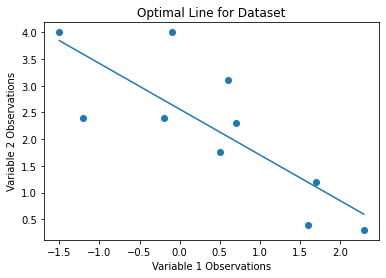

Optimal Line: y = 2.5609865142187043 + -0.8545148050425098x
Residual Sum of Squares: 5.467461888009383


In [4]:
rss_func = lambda b_0_hat, b_1_hat: sum([(y_i - b_0_hat - b_1_hat * x_i)**2 for x_i, y_i in dataset])

b_0_hat = (sum([x_i**2 for x_i, y_i in dataset]) * sum([y_i for x_i, y_i in dataset]) - sum([x_i for x_i, y_i in dataset]) * sum([x_i * y_i for x_i, y_i in dataset])) / (len(dataset) * sum([x_i**2 for x_i, y_i in dataset]) - sum([x_i for x_i, y_i in dataset])**2)
b_1_hat = (len(dataset) * sum([x_i * y_i for x_i, y_i in dataset]) - sum([x_i for x_i, y_i in dataset]) * sum([y_i for x_i, y_i in dataset])) / (len(dataset) * sum([x_i**2 for x_i, y_i in dataset]) - sum([x_i for x_i, y_i in dataset])**2)

x_vals = np.linspace(min([x_i for x_i, y_i in dataset]), max([x_i for x_i, y_i in dataset]), num=100)
y_vals = b_0_hat + b_1_hat * x_vals

plt.title("Optimal Line for Dataset")
plt.xlabel("Variable 1 Observations")
plt.ylabel("Variable 2 Observations")
plt.scatter(x=[p[0] for p in dataset], y=[p[1] for p in dataset])
plt.plot(x_vals, y_vals)
plt.show()

print("Optimal Line: y = {} + {}x".format(b_0_hat, b_1_hat))
print("Residual Sum of Squares:", rss_func(b_0_hat, b_1_hat))

Since the parameters $\hat{\beta}_0$, $\hat{\beta}_1$ can be calculated directly using a couple of formulas, the best fit line for least squares has a **closed form solution**.

The runtime of finding the least squares regression line is $O(n)$ since I only have to loop through the entire dataset a constant number of times to get the regression line.

### Matrix Calculation

The parameters $\hat{\beta}_0$, $\hat{\beta}_1$ can also be quickly calculated using matrices. I want to minimize the squared residual sum. In matrix form, the squared residual sum function can be represented as:

$$RSS = \hat{\boldsymbol\epsilon} \cdot \hat{\boldsymbol\epsilon} = \hat{\boldsymbol\epsilon}^\top\hat{\boldsymbol\epsilon}$$

Above, I am just taking the dot product of the residual vectors, which is the same as the matrix product of the $1 \times n$ row vector $\hat{\boldsymbol\epsilon}^\top$ by the $n \times 1$ column vector $\hat{\boldsymbol\epsilon}$, which is essentially just taking the total sum of each squared residual term.

The $RSS$ function can be written in terms of $\mathbf{Y}$, $\mathbf{X}$, and $\hat{\boldsymbol\beta}$:

$$RSS = (\mathbf{Y} - \mathbf{X}\hat{\boldsymbol\beta})^\top(\mathbf{Y} - \mathbf{X}\hat{\boldsymbol\beta})$$

Expanding and simplifying:

$$
RSS = \mathbf{Y}^\top\mathbf{Y} - \mathbf{Y}^\top\mathbf{X}\hat{\boldsymbol\beta} - \hat{\boldsymbol\beta}^\top\mathbf{X}^\top\mathbf{Y} + \hat{\boldsymbol\beta}^\top\mathbf{X}^\top\mathbf{X}\hat{\boldsymbol\beta} \\
RSS = \mathbf{Y}^\top\mathbf{Y} - 2\mathbf{Y}^\top\mathbf{X}\hat{\boldsymbol\beta} + \hat{\boldsymbol\beta}^\top\mathbf{X}^\top\mathbf{X}\hat{\boldsymbol\beta}
$$

Now, I can take the derivative of $RSS$ with respect to $\hat{\boldsymbol\beta}$ and set that derivative equal to the zero vector in order to find the $\hat{\boldsymbol\beta}$ vector that minimizes the $RSS$ function. This is akin to setting the gradient equal to $\mathbf{0}$ in the previous section.

So how do I take the derivative of the whole $RSS$ function with respect to $\hat{\boldsymbol\beta}$? There are two important concepts to apply here in order to differentiate the terms correctly.

The first concept is this: say I have a column vector $\vec{a}$ and a another column vector $\vec{b}$ of the same dimensions as $\vec{a}$ and I want to take the derivative of the dot product with respect to $\vec{b}$. The dot product can be written in any of the following forms:

$$\vec{a} \cdot \vec{b} = \vec{b} \cdot \vec{a} = a^\top b = b^\top a$$

The derivative of this product with respect to column vector $\vec{b}$ is always going to be column vector $\vec{a}$ so this means:

$$\frac{\partial}{\partial \vec{b}}(a^\top b) = \frac{\partial}{\partial \vec{b}}(b^\top a) = \vec{a}$$

The second concept I'll apply is the $uv$ differentiation formula:

$$(uv)' = u'v + uv'$$

Now, I have the tools needed to take the derivative of $RSS$ with respect to $\hat{\boldsymbol\beta}$. The derivative of the $RSS$ function with respect to $\hat{\boldsymbol\beta}$ is:

$$
RSS_{\hat{\boldsymbol\beta}} = -2(\mathbf{Y}^\top\mathbf{X})^\top(\hat{\boldsymbol\beta})' + (\hat{\boldsymbol\beta}^\top)'\mathbf{X}^\top\mathbf{X}\hat{\boldsymbol\beta} + (\hat{\boldsymbol\beta}^\top\mathbf{X}^\top\mathbf{X})^\top(\hat{\boldsymbol\beta})' \\
RSS_{\hat{\boldsymbol\beta}} = -2\mathbf{X}^\top\mathbf{Y} + \mathbf{X}^\top\mathbf{X}\hat{\boldsymbol\beta} + \mathbf{X}^\top\mathbf{X}\hat{\boldsymbol\beta} \\
RSS_{\hat{\boldsymbol\beta}} = -2\mathbf{X}^\top\mathbf{Y} + 2\mathbf{X}^\top\mathbf{X}\hat{\boldsymbol\beta}
$$

Note: the original resource I used to figure out this derivation is this YouTube video linked [here](https://www.youtube.com/watch?v=g8qF61P741w&ab_channel=ShivankGoel).

Setting $RSS_{\hat{\boldsymbol\beta}} = \mathbf{0}$, I can now solve for $\hat{\boldsymbol\beta}$:

$$
-2\mathbf{X}^\top\mathbf{Y} + 2\mathbf{X}^\top\mathbf{X}\hat{\boldsymbol\beta} = \mathbf{0} \\
\mathbf{X}^\top\mathbf{X}\hat{\boldsymbol\beta} = \mathbf{X}^\top\mathbf{Y} \\
\hat{\boldsymbol\beta} = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top\mathbf{Y}
$$

In order for the formula to work, it is implied that $\mathbf{X}^\top\mathbf{X}$ is a **full rank** matrix so that the inverse exists. Note that $\mathbf{X}^\top\mathbf{X}\hat{\boldsymbol\beta} = \mathbf{X}^\top\mathbf{Y}$ is the **normal equation**. It is called a normal equation because $\mathbf{Y}-\mathbf{X}\hat{\boldsymbol\beta}$ is normal to the range of $\mathbf{X}$ and $\mathbf{X}^\top\mathbf{X}$ is a **normal matrix**. ([source](https://mathworld.wolfram.com/NormalEquation.html))

So now I can find the $\hat{\beta}_0$, $\hat{\beta}_1$ parameters using matrix multiplication:

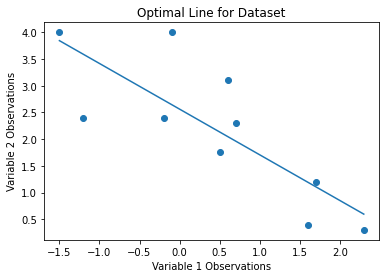

Optimal Line: y = 2.560986514218704 + -0.8545148050425094x
Residual Sum of Squares: 5.467461888009382


In [5]:
design_matrix = np.array([[1, x_i] for x_i, y_i in dataset])
response_vector = np.array([y_i for x_i, y_i in dataset])

estimated_parameters_vector = np.linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T @ response_vector

x_vals = np.linspace(min([x_i for x_i, y_i in dataset]), max([x_i for x_i, y_i in dataset]), num=100)
y_vals = estimated_parameters_vector[0] + estimated_parameters_vector[1] * x_vals

plt.title("Optimal Line for Dataset")
plt.xlabel("Variable 1 Observations")
plt.ylabel("Variable 2 Observations")
plt.scatter(x=[p[0] for p in dataset], y=[p[1] for p in dataset])
plt.plot(x_vals, y_vals)
plt.show()

print("Optimal Line: y = {} + {}x".format(estimated_parameters_vector[0], estimated_parameters_vector[1]))
print("Residual Sum of Squares:", rss_func(estimated_parameters_vector[0], estimated_parameters_vector[1]))

Expressing the formula for $\hat{\boldsymbol\beta}$ in matrix form makes it really easy to extend my understanding of linear regression from simple linear regression to multiple linear regression. If I wanted to account for some more independent variables when predicting some dependent variable, I can increase the length of $\hat{\boldsymbol\beta}$ to fit 1+ the number of independent variables I have and increase the number of columns of the design matrix $\mathbf{X}$ to fit 1+ the number of independent variables I have. This way I can compute a regression hyperplane in some $n$-dimensional space.

<span style="color:red">I'd imagine the runtime of this is also $O(n)$ assuming simple linear regression and not multiple linear regression, but I would have to revisit this statement if I ever end up learning about how numpy matrix transformations work under the hood.</span>

### Gradient Descent

The **gradient descent** algorithm can be applied to find the line of best fit. Although gradient descent might not give the exact values for parameters $\hat{\beta}_0$, $\hat{\beta}_1$ that are the solutions to the least squares best fit line problem, the values obtained should be very, very close to what the real values should actually be. The reason for this difference is due to the iterative "trial and error" approach that the gradient descent algorithm employs as well as the fact that there can be small rounding errors during the calculation process since the amount of computational memory a computer has is limited.

As established earlier, the gradient for the residual sum of squares (rewritten here) is:

$$
\nabla RSS =
\begin{bmatrix}
    RSS_{\hat{\beta}_0} \\
    RSS_{\hat{\beta}_1}
\end{bmatrix}
=
\begin{bmatrix}
    \sum\limits_{i = 1}^{n} -2(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
    \sum\limits_{i = 1}^{n} -2x_i(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)
\end{bmatrix}
$$

The main formula for the gradient descent algorithm can be described as:

$$
\begin{bmatrix}
    {\hat{\beta}_0}_{n+1} \\
    {\hat{\beta}_1}_{n+1}
\end{bmatrix}
=
\begin{bmatrix}
    {\hat{\beta}_0}_n \\
    {\hat{\beta}_1}_n
\end{bmatrix}
- \eta
\nabla RSS ({\hat{\beta}_0}_n, {\hat{\beta}_1}_n)
$$

where $\eta$ is the step size/**learning rate** and $n$ represents the number of iterations (not to be confused with $n$ in the residual sum of squares formula $RSS$ which represents the number of points). The idea behind this algorithm is that if I start with some random initial "point" $(\hat{\beta}_0, \hat{\beta}_1)$, I can calculate the "slope" of the $RSS$ function at that point. If the "slope" is negative, I need to increase my $\hat{\beta}_0$, $\hat{\beta}_1$ values by a little bit to move in the direction of the local minimum of the $RSS$ function. Likewise, if the "slope" is positive, I need to decrease my $\hat{\beta}_0$, $\hat{\beta}_0$ values a little bit to move in the direction of the local minimum. If the "slope" reaches 0, then I have found my minimum point $(\hat{\beta}_0, \hat{\beta}_1)$. The learning rate $\eta$ is a small number (typically between 0 and 1) that scales the value of the "slope" down so that I don't take giant steps with each iteration because if the overall value of $\eta\nabla RSS$ is too big, I could overshoot and the $\hat{\beta}_0$ and $\hat{\beta}_1$ values might never converge onto single point. In general, if I pick a good initial learning rate $\eta$ and a good initial starting point $({\hat{\beta}_0}_0, {\hat{\beta}_1}_0)$, then, with enough iterations, I can expect the gradient descent algorithm to converge onto a point $(\hat{\beta}_0, \hat{\beta}_1)$ that will minimize the $RSS$ function.

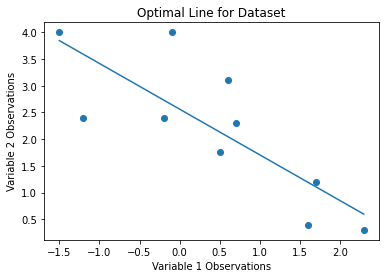

Optimal Line: y = 2.560986514218691 + -0.8545148050425041x
Residual Sum of Squares: 5.467461888009381


In [6]:
rss_func = lambda b_0_hat, b_1_hat: sum([(y_i - b_0_hat - b_1_hat * x_i)**2 for x_i, y_i in dataset])

rss_b_0_hat = lambda b_0_hat, b_1_hat: sum([-2 * (y_i - b_0_hat - b_1_hat * x_i) for x_i, y_i in dataset])
rss_b_1_hat = lambda b_0_hat, b_1_hat: sum([-2 * x_i * (y_i - b_0_hat - b_1_hat * x_i) for x_i, y_i in dataset])

lr = 0.001
b_0_hat = 0
b_1_hat = 0

for i in range(0, 100000):
    b_0_hat = b_0_hat - lr * rss_b_0_hat(b_0_hat, b_1_hat)
    b_1_hat = b_1_hat - lr * rss_b_1_hat(b_0_hat, b_1_hat)

x_vals = np.linspace(min([x_i for x_i, y_i in dataset]), max([x_i for x_i, y_i in dataset]), num=100)
y_vals = b_0_hat + b_1_hat * x_vals

plt.title("Optimal Line for Dataset")
plt.xlabel("Variable 1 Observations")
plt.ylabel("Variable 2 Observations")
plt.scatter(x=[p[0] for p in dataset], y=[p[1] for p in dataset])
plt.plot(x_vals, y_vals)
plt.show()

print("Optimal Line: y = {} + {}x".format(b_0_hat, b_1_hat))
print("Residual Sum of Squares:", rss_func(b_0_hat, b_1_hat))

The runtime of finding the least squares best fit line using gradient descent is proportional to the size of the dataset $n$. Since the gradient descent method requires me to set a predetermined number of iterations, the runtime of finding the best fit line is just $O(n)$.

### Stochastic Gradient Descent

What if I want to find the least squares best fit line given a huge dataset of points? Maybe I have millions of points, or billions points, or trillions of points, or more. Then, the methods listed above to find the least squares best fit line just might not useable simply because computers do not have enough internal memory to hold information on all the input data and all the intermediate calculations needed to calculate the residual sum of squares. I can use **stochastic gradient descent** (SGD) to try to solve problems where I am unable to process the data I have all at once.

Just as like how the terms _gradient descent_ and _stochastic gradient descent_ are very similar, the algorithmic implementations, functions/variables used, and goal of the algorithms are very similar as well. Let me again rewrite the residual sum of squares and its gradient:

$$
RSS = \sum\limits_{i = 1}^{n} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2 \\
\nabla RSS =
\begin{bmatrix}
    RSS_{\hat{\beta}_0} \\
    RSS_{\hat{\beta}_1}
\end{bmatrix}
=
\begin{bmatrix}
    \sum\limits_{i = 1}^{n} -2(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
    \sum\limits_{i = 1}^{n} -2x_i(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)
\end{bmatrix}
$$

Since I can't (or won't) calculate $RSS$ seeing that it requires using all data points in my dataset, I need formulate a different function to minimize.

With stochastic gradient descent, I'm only considering and processing one random (stochastic) point from my dataset at any given time. Therefore, the best I can do is minimize the squared distance between my predicted $\hat y_i$ value and the $y_i$ value in my dataset (the "true" $y_i$ value) for some given $x_i$ in my dataset. The function that I have to optimize the parameters for is then expressed as:

$$
MSE = \frac{1}{n} \sum\limits_{i = 1}^{n} (y_i - \hat y_i)^2 \\
MSE = \frac{1}{n} \sum\limits_{i = 1}^{n} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2
$$

where $MSE$ is the **mean squared error** (the average of all the squared errors considered) and $n$ is the number of datapoints at each processing step. The $n$ here is not to be confused with the $n$ that represents the number of points in my entire dataset. The $n$ here for stochastic gradient descent is $1$ since I am only processing one point at a time.

The gradient for $MSE$ is:

$$
\nabla MSE =
\begin{bmatrix}
    MSE_{\hat{\beta}_0} \\
    MSE_{\hat{\beta}_1}
\end{bmatrix}
=
\begin{bmatrix}
    \frac{1}{n} \sum\limits_{i = 1}^{n} -2(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
    \frac{1}{n} \sum\limits_{i = 1}^{n} -2x_i(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)
\end{bmatrix}
$$

I can see that $MSE$ is very similar to $RSS$. The only two major differences with $MSE$ is that I take the average of the sum of squares and I am only considering a small subset of my whole dataset.

The update formula then for stochastic gradient descent is basically the same as gradient descent, but using $MSE$ instead of $RSS$:

$$
\begin{bmatrix}
    {\hat{\beta}_0}_{n+1} \\
    {\hat{\beta}_1}_{n+1}
\end{bmatrix}
=
\begin{bmatrix}
    {\hat{\beta}_0}_n \\
    {\hat{\beta}_1}_n
\end{bmatrix}
- \eta
\nabla MSE ({\hat{\beta}_0}_n, {\hat{\beta}_1}_n)
$$

Because stochastic gradient descent requires me to update the $\hat{\beta}_0$, $\hat{\beta}_1$ values after processing each data point in the dataset instead of updating the $\hat{\beta}_0$, $\hat{\beta}_1$ values by considering all the points simultaneously as is done in gradient descent, I can end up with different final $\hat{\beta}_0$, $\hat{\beta}_1$ values depending on what order I process the data points. In order for stochastic gradient descent to converge onto some more stable $\hat{\beta}_0$, $\hat{\beta}_1$ values, I have to run the SGD algorithm for several **epochs** (iterations over the whole input dataset), shuffling the order of data points processed with each new epoch.

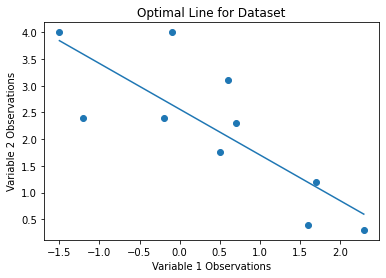

Optimal Line: y = 2.560801714887752 + -0.8545126158373093x
Residual Sum of Squares: 5.467462226031817


In [7]:
mse_func = lambda x_i, y_i, b_0_hat, b_1_hat: (y_i - b_0_hat - b_1_hat * x_i)**2

mse_b_0_hat = lambda x_i, y_i, b_0_hat, b_1_hat: -2 * (y_i - b_0_hat - b_1_hat * x_i)
mse_b_1_hat = lambda x_i, y_i, b_0_hat, b_1_hat: -2 * x_i * (y_i - b_0_hat - b_1_hat * x_i)

lr = 0.001
b_0_hat = 0
b_1_hat = 0

for epoch in range(0, 100000):
    random.shuffle(dataset)
    for i in range(0, len(dataset)):
        b_0_hat = b_0_hat - lr * mse_b_0_hat(dataset[i][0], dataset[i][1], b_0_hat, b_1_hat)
        b_1_hat = b_1_hat - lr * mse_b_1_hat(dataset[i][0], dataset[i][1], b_0_hat, b_1_hat)

x_vals = np.linspace(min([x_i for x_i, y_i in dataset]), max([x_i for x_i, y_i in dataset]), num=100)
y_vals = b_0_hat + b_1_hat * x_vals

plt.title("Optimal Line for Dataset")
plt.xlabel("Variable 1 Observations")
plt.ylabel("Variable 2 Observations")
plt.scatter(x=[p[0] for p in dataset], y=[p[1] for p in dataset])
plt.plot(x_vals, y_vals)
plt.show()

rss_func = lambda b_0_hat, b_1_hat: sum([(y_i - b_0_hat - b_1_hat * x_i)**2 for x_i, y_i in dataset])

print("Optimal Line: y = {} + {}x".format(b_0_hat, b_1_hat))
print("Residual Sum of Squares:", rss_func(b_0_hat, b_1_hat))

My intuition behind stochastic gradient descent feels good enough here that I feel like I can use stochastic gradient descent comfortably in other optimization problems. <span style="color:red">If I want to later, I can write out a proof here showing that the SGD algorithm arrives at the same result as the gradient descent algorithm, or I can add a just add a link for the proof here.</span>

The runtime of finding the least squares best fit line using stochastic gradient descent is proportional to the size of the dataset $n$. Since the stochastic gradient descent method requires me to set a predetermined number of epochs, the runtime of finding the best fit line is just $O(n)$.

# Appendix

#### Versions Used

python 3.8.9  
jupyterlab 3.3.4  
matplotlib 3.5.1  
numpy 1.21.5